In [1]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
def polynomial_dataframe(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

In [3]:
dtype_dict = {
    'bathrooms': float,
    'bedrooms': float,
    'condition': int,
    'date': str,
    'floors': str,
    'grade': int,
    'id': str,
    'lat': float,
    'long': float,
    'price': float,
    'sqft_above': int,
    'sqft_basement': int,
    'sqft_living': float,
    'sqft_living15': float,
    'sqft_lot': int,
    'sqft_lot15': float,
    'view': int,
    'waterfront': int,
    'yr_built': int,
    'yr_renovated': int,
    'zipcode': str
}

In [4]:
kc_house_data = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)

wk3_kc_house_train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype = dtype_dict)

wk3_kc_house_test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)

wk3_kc_house_valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype = dtype_dict)

wk3_kc_house_set_1_data = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype = dtype_dict)

wk3_kc_house_set_2_data = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype = dtype_dict)

wk3_kc_house_set_3_data = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype = dtype_dict)

wk3_kc_house_set_4_data = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype = dtype_dict)

sales = kc_house_data.sort_values(['sqft_living','price'])

In [5]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [6]:
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


In [7]:
model1 = LinearRegression()
model1.fit(poly1_data[['power_1']], poly1_data['price'])
print(model1.coef_)

[ 280.6235679]


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


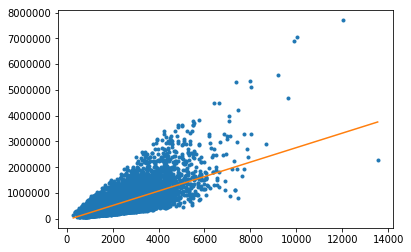

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(
    poly1_data['power_1'],
    poly1_data['price'],
    '.',
    poly1_data['power_1'],
    model1.predict(poly1_data[['power_1']]),
    '-'
)

In [52]:
def process_poly_n(data_set, n):
    sales = data_set.sort_values(['sqft_living','price'])

    poly_n_data = polynomial_dataframe(sales['sqft_living'], n)
    features = poly_n_data.columns.values
    print(features)

    poly_n_data['price'] = sales['price']
    
    model = LinearRegression()
    model.fit(poly_n_data[features], poly_n_data['price'])
    print(model.coef_, model.intercept_)

    plt.plot(
        poly_n_data['power_1'],
        poly_n_data['price'],
        '.',
        poly_n_data['power_1'],
        model.predict(poly_n_data[features]),
        '-'
    )

['power_1']
[ 280.6235679] -43580.7430945


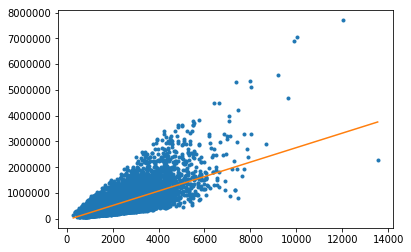

In [53]:
process_poly_n(kc_house_data, 1)

['power_1' 'power_2']
[  6.79940947e+01   3.85812609e-02] 199222.279305


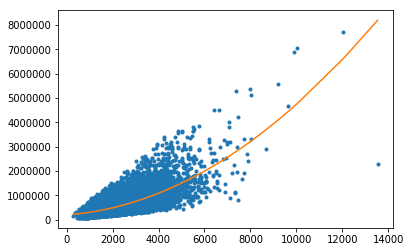

In [54]:
process_poly_n(kc_house_data, 2)

['power_1' 'power_2' 'power_3']
[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06] 336819.748221


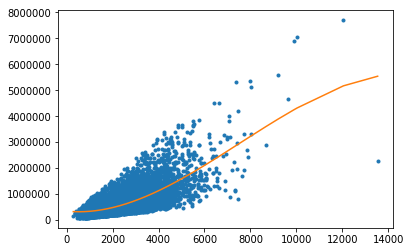

In [55]:
process_poly_n(kc_house_data, 3)

['power_1' 'power_2' 'power_3' 'power_4' 'power_5' 'power_6' 'power_7'
 'power_8' 'power_9' 'power_10' 'power_11' 'power_12' 'power_13' 'power_14'
 'power_15']
[  4.56404164e-91  -2.64606098e-50   4.63261894e-56  -2.13210389e-60
   1.68437469e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53] 537116.329638


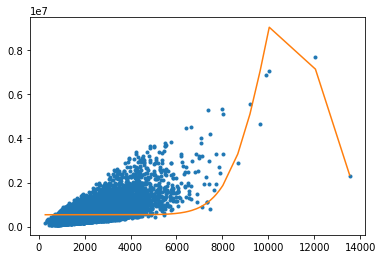

In [56]:
process_poly_n(kc_house_data, 15)

['power_1' 'power_2' 'power_3' 'power_4' 'power_5' 'power_6' 'power_7'
 'power_8' 'power_9' 'power_10' 'power_11' 'power_12' 'power_13' 'power_14'
 'power_15']
[  3.65649652e-89  -3.49016199e-49  -4.98000586e-55  -1.86048629e-59
   3.18123891e-73   8.36182560e-70   5.73133489e-66   3.83786524e-62
   2.47884969e-58   1.51269750e-54   8.40594099e-51   3.93663091e-47
   1.24240972e-43  -2.25041880e-47   1.01236550e-51] 534979.812425
['power_1' 'power_2' 'power_3' 'power_4' 'power_5' 'power_6' 'power_7'
 'power_8' 'power_9' 'power_10' 'power_11' 'power_12' 'power_13' 'power_14'
 'power_15']
[  2.71335933e-77   7.33543671e-39   8.99952909e-45  -2.42246376e-49
   2.34153792e-53  -3.78400489e-57   3.64549518e-55   1.50416248e-51
   5.76015630e-48   1.95770486e-44   5.39396508e-41   9.40376308e-38
  -3.63529121e-41   4.65476497e-45  -1.97197822e-49] 506771.947696
['power_1' 'power_2' 'power_3' 'power_4' 'power_5' 'power_6' 'power_7'
 'power_8' 'power_9' 'power_10' 'power_11' 'power_12' 'power_

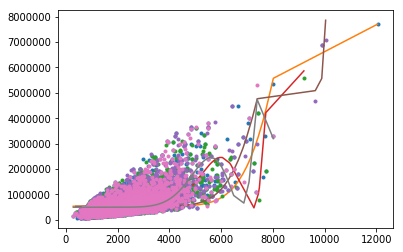

In [57]:
process_poly_n(wk3_kc_house_train_data, 15)

process_poly_n(wk3_kc_house_set_2_data, 15)

process_poly_n(wk3_kc_house_set_3_data, 15)

process_poly_n(wk3_kc_house_set_4_data, 15)

In [61]:
def get_residual_sum_of_squares(predictions, real):
    errors = real - predictions
    rss = sum(errors * errors)
    return rss

In [62]:
sales_train = wk3_kc_house_train_data.sort_values(['sqft_living','price'])

sales_test = wk3_kc_house_test_data.sort_values(['sqft_living','price'])

sales_valid = wk3_kc_house_valid_data.sort_values(['sqft_living','price'])

In [69]:
def check():
    for n in range(1, 16):
        poly_n_data = polynomial_dataframe(sales_train['sqft_living'], n)
        features = poly_n_data.columns.values
        poly_n_data['price'] = sales_train['price']
        model = LinearRegression()
        model.fit(poly_n_data[features], poly_n_data['price'])

        poly_n_data_valid = polynomial_dataframe(sales_valid['sqft_living'], n)
        poly_n_data_valid['price'] = sales_valid['price']
        rss_valid = get_residual_sum_of_squares(model.predict(poly_n_data_valid[features]), poly_n_data_valid['price'])

        poly_n_data_test = polynomial_dataframe(sales_test['sqft_living'], n)
        poly_n_data_test['price'] = sales_test['price']
        rss_test= get_residual_sum_of_squares(model.predict(poly_n_data_test[features]), poly_n_data_test['price'])
        
        print('%s\t%s\t%s' % (n, rss_valid, rss_test))


In [70]:
check()

1	629097886299586.0	142347931358638.75
2	623955062706518.9	135542039274080.47
3	625820280251623.1	135585996079052.6
4	629987338893942.1	135382681375063.9
5	628238341217580.6	135495950556949.22
6	566268633432615.4	135225122043501.92
7	1073843115982915.8	133047336138791.45
8	7087836989212522.0	134873971823507.3
9	4.530282458175749e+16	145661890866133.44
10	2.47422842715091e+17	163701088200114.3
11	1.1940808585038874e+18	184483515753267.94
12	5.090599643260048e+18	204320005123421.22
13	7.616230021307916e+17	269960927584794.75
14	2.297560925024337e+18	274049430547456.38
15	6.955038097129583e+18	276693705523304.66
